# SKLearn 14 - Classification Task dengan Support Vector Machine (SVM)

## Konsep Dasar
### Decision Boundary (Hyperplane)
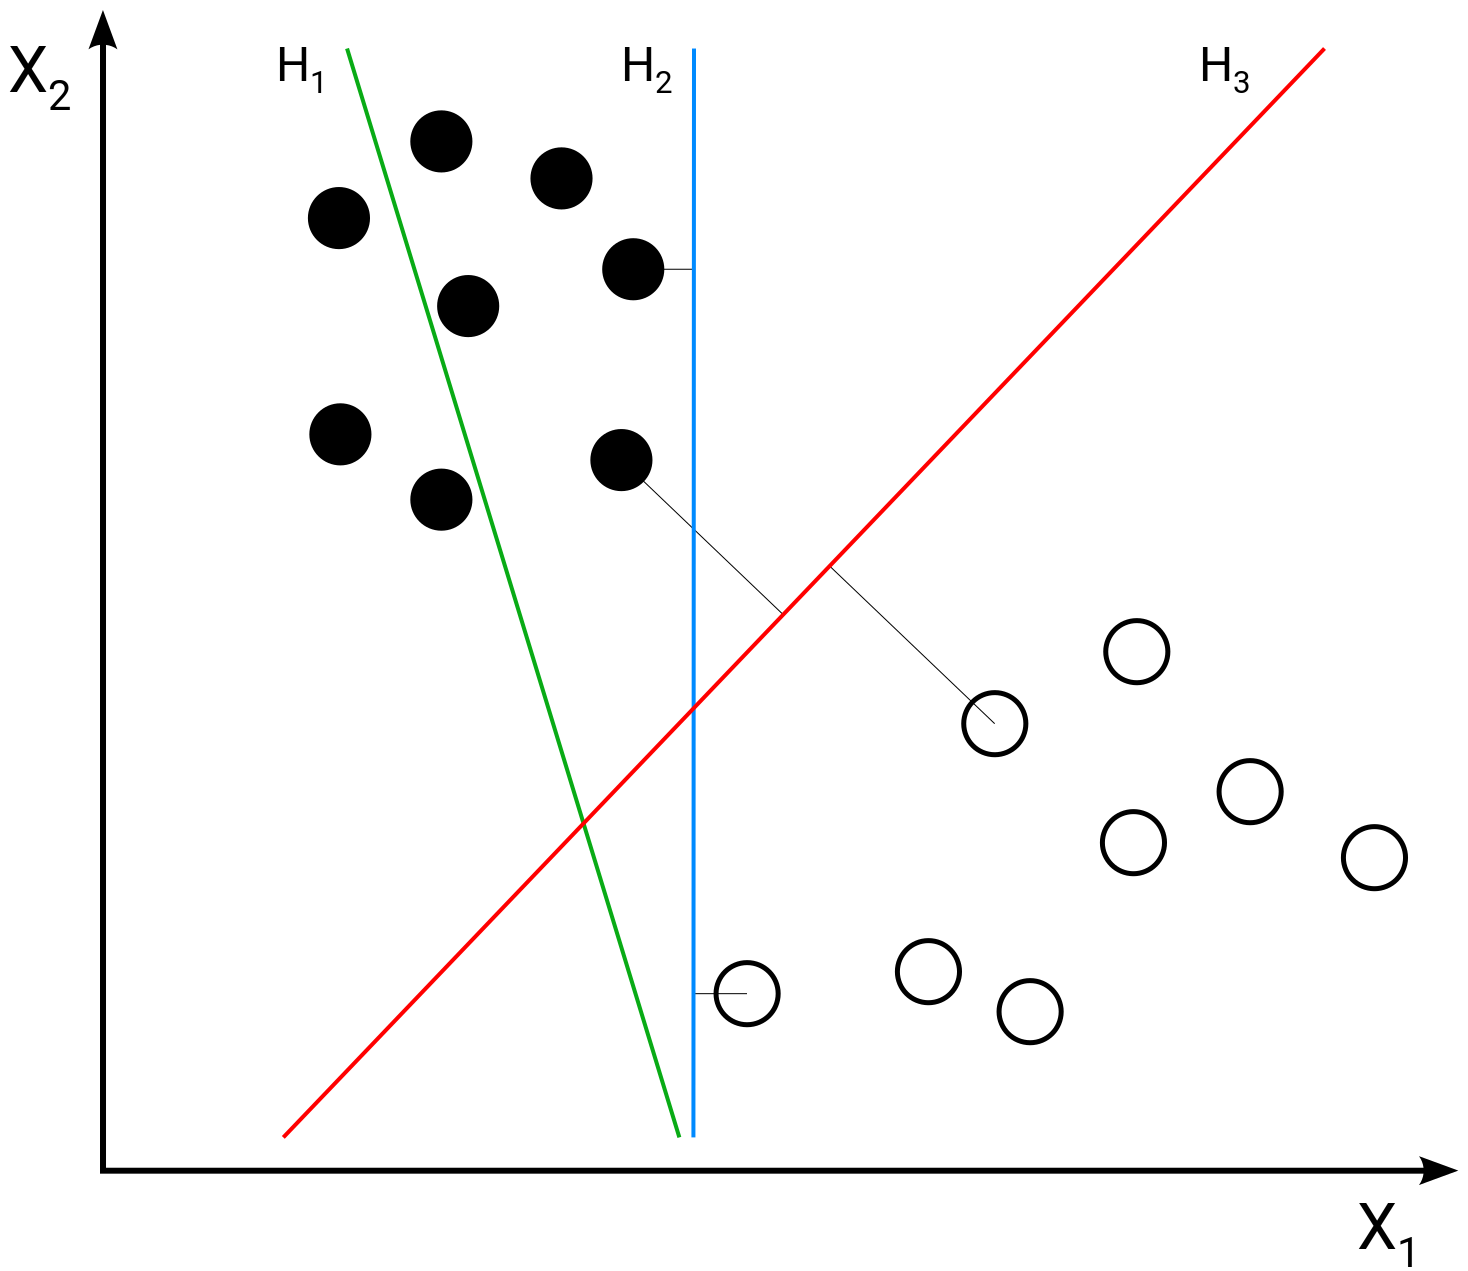

Kita dihadapkan pada sebuah kasus klasifikasi yang terdiri atas 2 class (hitam dan putih) dan 2 features ($X_1$ dan $X_2$). Pada kasus ini, kita diminta untuk menarik suatu garis linear yang dapat memisahkan class tersebut. 

Terdapat 3 pilihan garis linear untuk memisahkan class tersebut, yaitu $H_1$, $H_2$, dan $H_3$.
- $H_1$ tidak dapat digunakan sebagai garis pemisah antar class karena terdapat anggota class hitam yang masuk ke daerah class putih.
- $H_2$ dan $H_3$ dapat memisahkan kedua class dengan sempurna. Namun, garis pemisah yang paling baik untuk digunakan adalah $H_3$ karena memiliki margin yang lebih besar (maximum margin) dibandingkan dengan $H_2$.

Hyperplane adalah terminologi dasar yang umum digunakan untuk merepresentasikan decision boundary. Dalam kasus di atas, kita memiliki 2 features sehingga plotting yang dihasilkan adalah plotting 2 dimensi.
- Plotting 1 dimensi (terdiri atas 1 feature) akan memiliki decision boundary berupa titik atau nilai threshold.
- Plotting 2 dimensi (terdiri atas 2 features) akan memiliki decision boundary berupa garis.
- Plotting 3 dimensi (terdiri atas 3 features) akan memiliki decision boundary berupa bidang datar.
- Plotting 4 dimensi atau lebih (terdiri atas 4 atau lebih features) akan memiliki decision boundary berupa bidang multidimensi atau dikenal dengan istilah hyperplane.

#### Notes:
- Dalam classification task, pemisah atau pembatas class dikenal dengan istilah `decision boundary`.
- Pada SVM, untuk menyederhanakan istilah, setiap decision boundary yang dihasilkan umumnya disebut dengan istilah `hyperplane`.
- Pada intinya, SVM mencari decision boundary yang dapat memisahkan antar class dengan baik.

### Maximum Margin
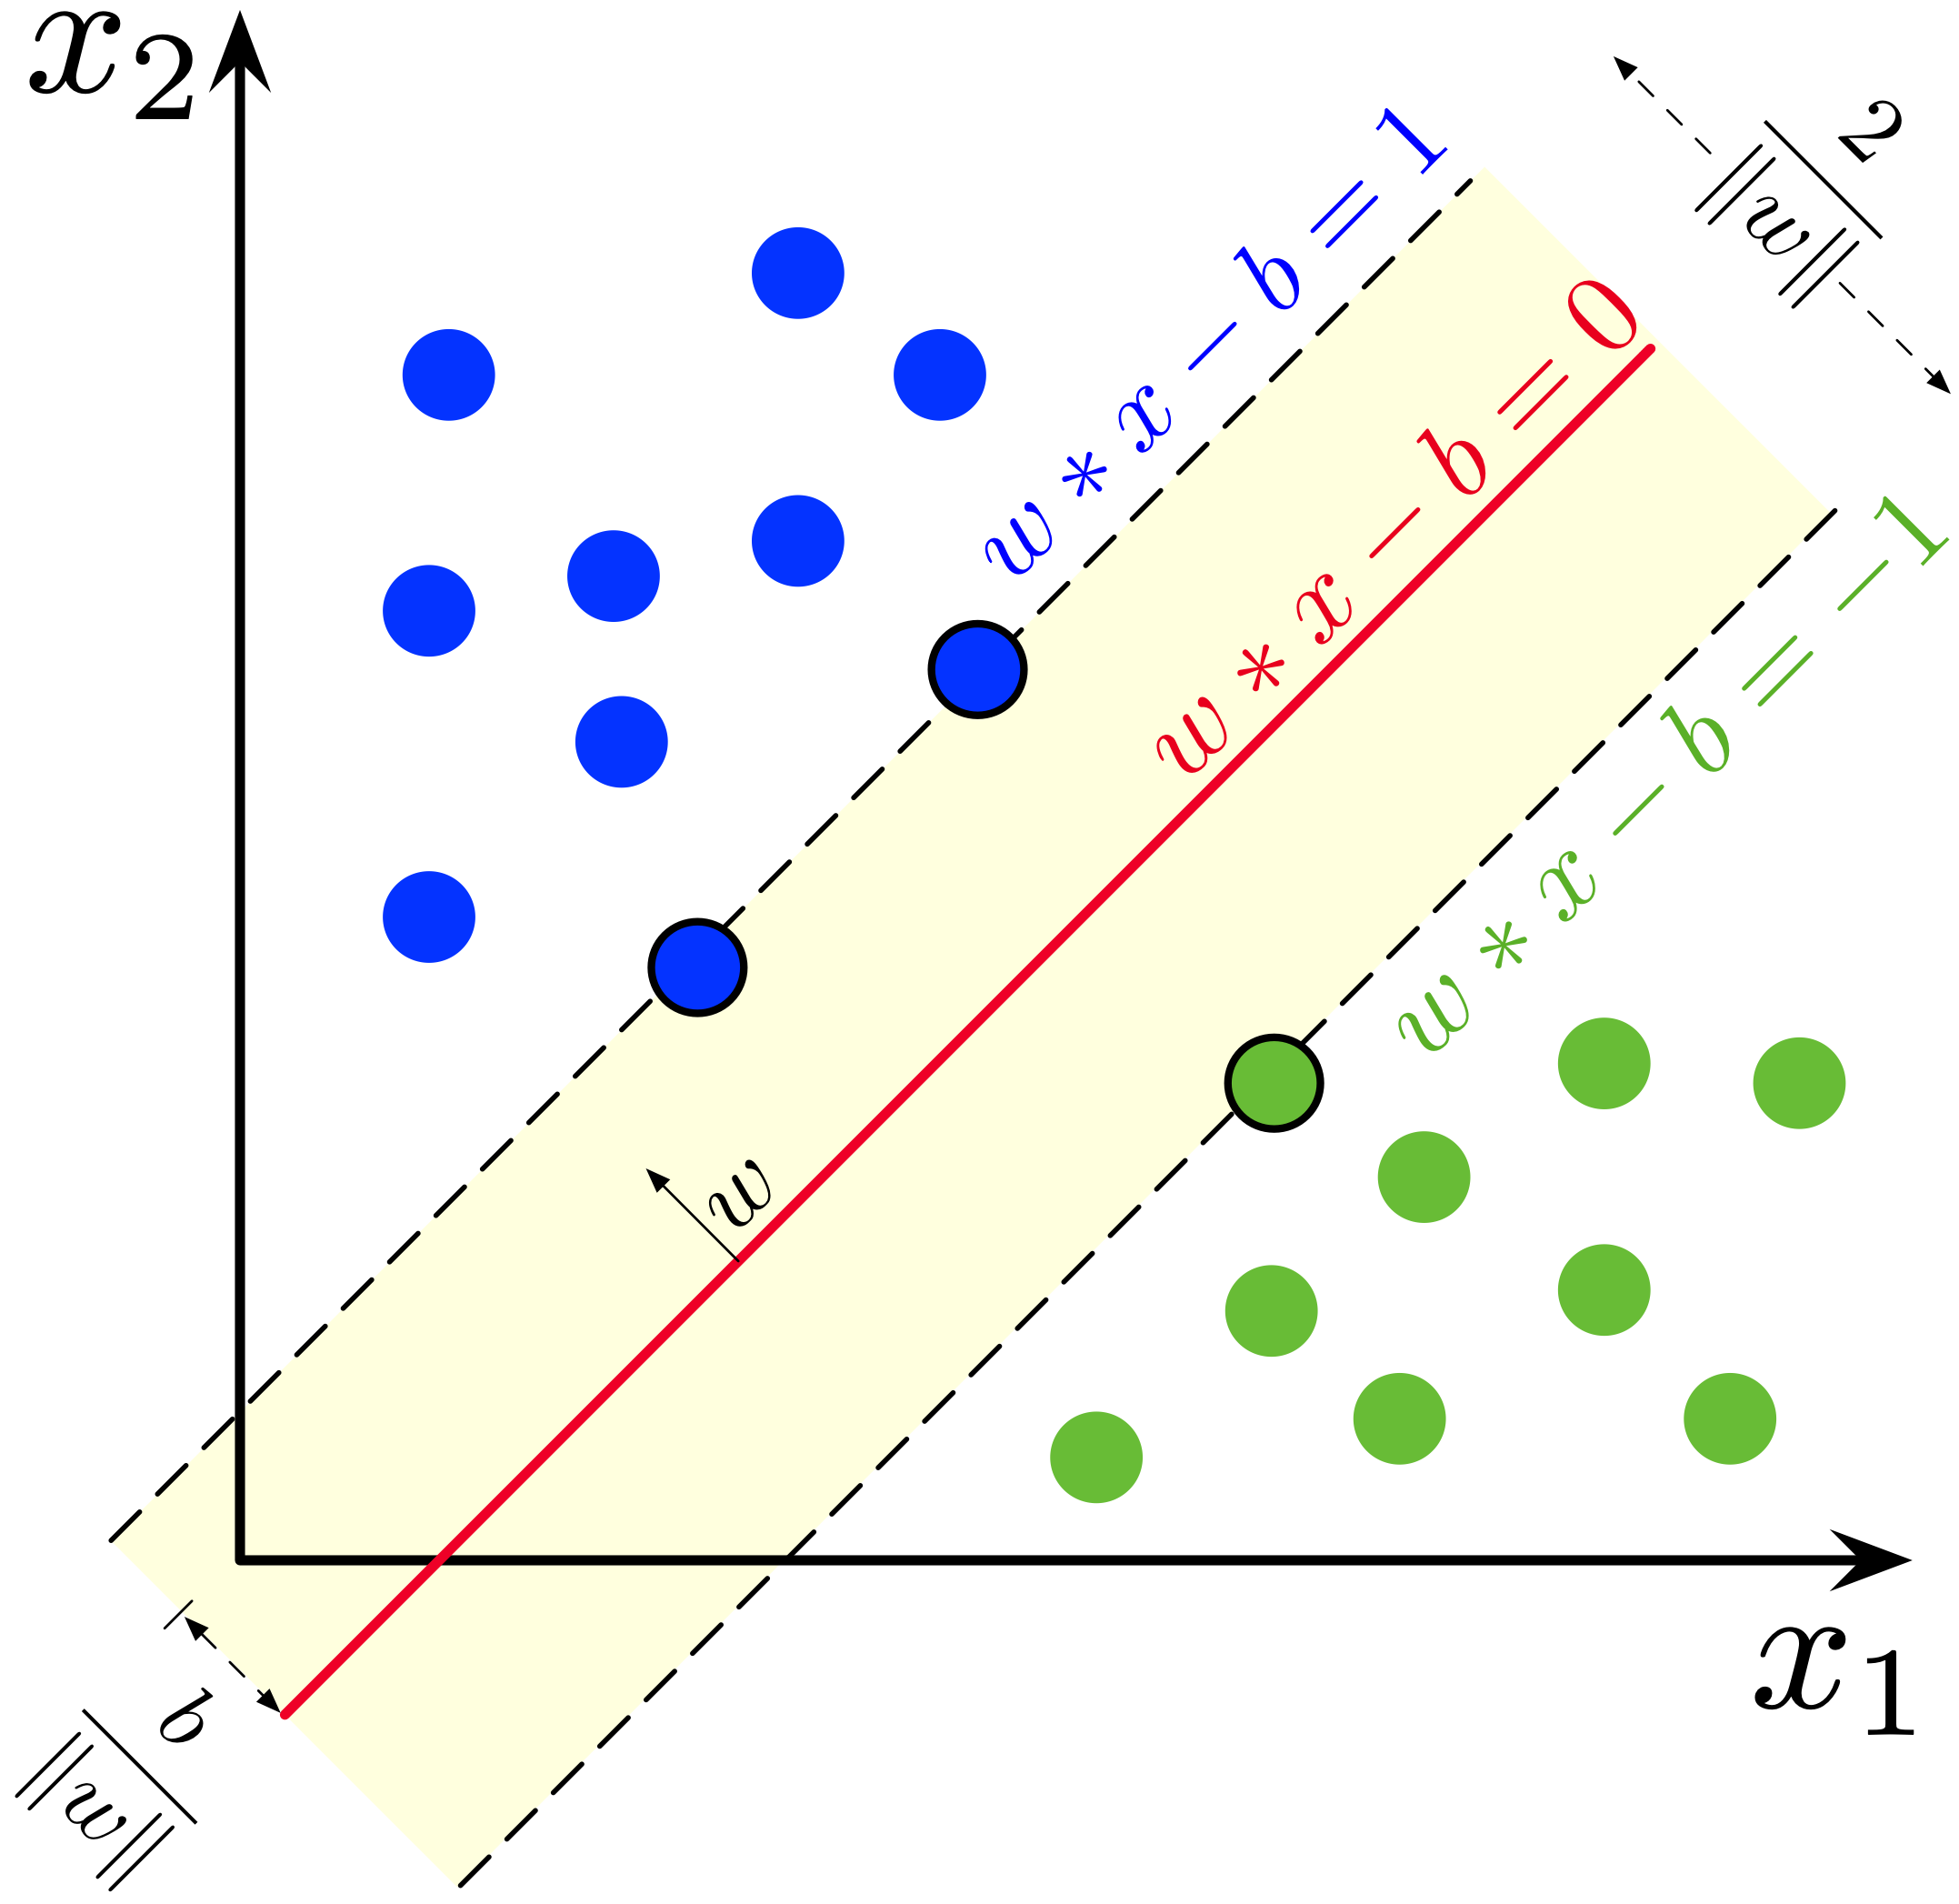

Pada kali ini, kita dihadapkan dengan kasus klasifikasi yang terdiri atas: 
- Dua buah class (biru dan hijau).
- Dua features ($X_1$ dan $X_2$).
- Decision boundary berupa garis linear berwarna merah.
- Area yang berwarna kuning merupakan margin.
- Terdapat 3 data point yang menjadi support vector.

#### Notes:
- `Margin` ditentukan berdasarkan jarak terdekat antara decision boundary dengan anggota class yang ingin dipisahkan. 
- Anggota class yang berperan dalam menentukan margin dikenal dengan istilah `support vector`.
- Support vector merupakan anggota dari class yang memiliki jarak paling dekat dengan decision boundary.
- Dalam menentukan decision boundary, SVM akan memilih berdasarkan margin terbesar atau dikenal dengan istilah `maximum margin`.

### Linearly Inseperable & Kernel Tricks
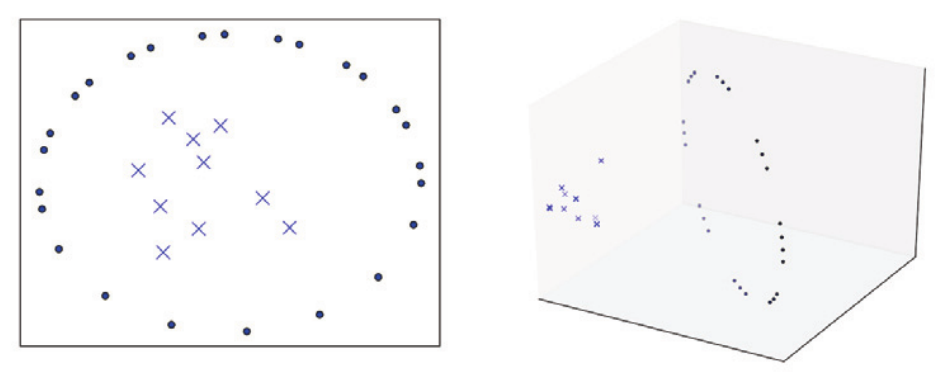

Pada bagian sebelumnya, kita sudah mengenal penggunaan decision boundary berupa garis linear. Namun, pada beberapa kasus decision boundary berupa garis linear tidak dapat memisahkan antar class dengan baik seperti terlihat pada gambar di atas.

Kita dihadapkan oleh classification task yang terdiri dari:
- Dua class ( $.$ dan $x$)
- Dua buah features sehingga menghasilkan plotting 2D.
Pada kasus kali ini, tidak memungkinkan kita untuk membagi class tersebut menggunakan decision boundary berupa garis linear atau dikenal dengan `linearly inseperable`. 

Langkah yang dapat dilakukan untuk mengatasi linearly inseperable, SVM akan memproyeksikan data yang ada ke dalam dimensi yang lebih tinggi. Artinya, bila data yang sebelumnya berada dalam kondisi 2D  dan tidak bisa dipisahkan menggunakan decision boundary berupa garis linear, maka data tersebut akan diproyeksikan ke dalam kondisi 3D. `Setelah diproyeksikan ke dalam bentuk 3D, class $.$ dan $x$ dapat dipisahkan menggunakan decision boundary berupa bidang datar.`

Proses proyeksi data ke dalam bentuk dimensi yang lebih tinggi akan membuat kenaikan beban komputasi. Untuk mengatasinya, SVM menawarkan teknik efisien yang dikenal dengan istilah `Kernel Tricks`. Terdapat beberapa jeni kernel yang disediakan SVM, seperti `polinomial, sigmoid, dan RBF(radial basis function)`.

## Dataset: The MNIST Database of Handwritten Digits

Referensi: http://yann.lecun.com/exdb/mnist/

- `Dataset: The MNIST Database of Handwritten Digits` berisikan gambar tulisan tangan manusia dari angka 0-9. Dataset ini umum digunakan untuk melakukan perbandingan performa model machine learning dalam mengenali angka dari tulisan manusia.
- Untuk mendownload dataset, kita dapat mengimport `fetch_openml` (untuk dataset yang tersedia di repository openml)
- Parameter pada pemanggilan fetch_openml
    - Parameter pertama : nama dataset
    - Parameter kedua : lokasi untuk menyimpan hasil download dataset
    - Parameter ketiga : `return_X_y=True` untuk memisahkan features dan target labelnya.
- Menampilkan dimensi data dari features dengan memanggil `X.shape`

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./mnist', return_X_y=True)
X.shape

(70000, 784)

- Dataset yang kita gunakan berisikan data image, untuk menampilkan datanya kita dapat memanggil matplotlib.
    - matplotlib.pyplot
    - matplotlib.cm, cm merespresentasikan color map
- Melakukan looping terhadap 8 data pertama dengan melakukan slicing.
    `for data in X[:8]:`

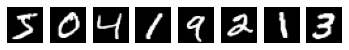

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

- Menampilkan 8 label yang berkorelasi dengan 8 data pertama yang ditampilkan sebelumnya.

In [3]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

### Membagi Dataset Menjadi Training dan Testing Dataset
- 60.000 data pertama digunakan sebagai training dataset
- 1.0000 data terakhir digunakan sebagai testing dataset

In [4]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## Classification dengan SVC (Support Vector Classifier)
- Mengimport SVC
- Membuat object model SVC
- Melakukan training dari object model SVC yang dibuat dengan memanggil method `fit()` dengan menyertakan training datasetnya.

In [5]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

### Mengevaluasi Performa Model
- Mengimport classification_report
- Melakukan prediksi dengan memanggil method `predict()` terhadap X_test
- Menampilkan hasil classification report dari perbandingan antara y_test dengan y_pred.

In [6]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Hasil dari classification report:
- Terdapat 10 class (0-9) yang setiap classnya memiliki nilai precision, recall, dan f1-score.
- Terdapat nilai precision, recall, f1-score, dan accuracy secara keseluruhan.

## Hyperparameter Tuning dengan GridSearchCV
- Hyperparameter adalah parameter yang digunakan untuk mengatur proses training dari suatu model

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


In [6]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

0.9298245614035088

## Predict & Evaluate

In [7]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

0.9298245614035088